<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>
    
<h2>Workers productivity</h2>

<h4> 
- Ballesteros Valenzuela, Diana Laura.
- Granich Armenta, Aaron Francisco.
- Reyes Paz, Melissa. 
- Rodríguez Martínez, Eliud Gilberto.
</h4>

<p>
<img src="https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg" width="150">
</p>
    
</center>

Contenido:
- Analisis de datos de la productividad de trabajadores.
- Modelo predictivo de la productividad de los trabajadores.

Importamos librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.metrics import accuracy_score,r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

Leemos nuestros datos

In [2]:
df = pd.read_csv('garments_worker_productivity - copia.csv')

In [3]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/15,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01/01/15,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01/01/15,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01/01/15,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01/01/15,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03/11/15,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03/11/15,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03/11/15,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03/11/15,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Atributos del dataset:
1. **date**: Fecha en MM-DD-AAAA
3. **quarter**: Una parte del mes. Un mes se divide en cuatro trimestres
4. **department**: Departamento asociado
2. **day**: Día de la semana
5. **team**: Número de equipo asociado a la instancia
8. **targeted_productivity**: Objetivo de productividad fijado por la autoridad para cada equipo para cada día
9. **smv**: Valor estándar del minuto, es el tiempo asignado a una tarea 
10. **wip**: Trabajos en curso. Incluye el número de artículos sin terminar para los productos 
11. **over_time**: Representa la cantidad de tiempo extra de cada equipo en minutos
12. **incentive**: Representa el importe del incentivo financiero (en BDT) que permite o motiva una determinada acción
13. **idle_time**: La cantidad de tiempo en que la producción se interrumpió debido a varias razones 
14. **idle_men**: El número de trabajadores que estuvieron inactivos debido a la interrupción de la producción
7. **no_of_style_change**: Número de cambios en el estilo de un determinado producto
6. **no_of_workers**: Número de trabajadores en cada equipo
15. **actual_productivity**: Es el porcentaje real de productividad que han aportado los trabajadores. Va de 0 a 1.

# Analisis exploratorio

Ahora fusionemos los dos departamentos de "finishing".

In [4]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )

### Saquemos algunas graficas

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df = df[df['wip'].notna()]
df= df.drop(columns=['date'])

Aqui, tomaremos dos vertientes:
- Una sera la eliminacion de los valores que en la productividad actual sean mayores a 1
- Otra sera el remplazo por 1 todos aquellos valores que sobrepasen el rango de 0-1

In [7]:
# df = df.drop(df[df['actual_productivity'] > 1].index)  #Eliminación de los elementos mayores a 1
df.loc[df['actual_productivity'] > 1, 'actual_productivity'] = 1 #Remplazo del valor a los de fuera de rango

In [8]:
df2= df.copy()

### Implementacion PCA

Con el fin de obtener mas respuestas de nuestros datos, aplicaremos PCA para ver que tanto explica la varianza nuestros datos. 

En los datos, puedes ver algunas columnas no numéricas. Así que antes de aplicar PCA vamos a codificarlas.

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
#!pip install MultiColumnLabelEncoder

In [11]:
import MultiColumnLabelEncoder

In [12]:
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
df = Mcle.fit_transform(df)

In [13]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,0,0,0,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,0,0,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,0,0,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,0,0,0,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1,0,5,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,1,0,5,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,1,0,5,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,1,0,5,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [9]:
one_hot_encoded_data = pd.get_dummies(df2, columns = ['quarter','department','day'])
one_hot_encoded_data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sewing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,1,0,0,0,1,0,0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,1,0,0,0,1,0,0
5,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,...,0,0,0,1,0,0,0,0,0,1
1188,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,...,0,0,0,1,0,0,0,0,0,1
1189,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,...,0,0,0,1,0,0,0,0,0,1
1190,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,...,0,0,0,1,0,0,0,0,0,1


### Escalando nuestros datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()


# standarizing data
scaled_data = scaler.fit_transform(df)

#scaled_data2 = scaler.fit_transform(one_hot_encoded_data)

# creating dataframe with standarized features
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)



In [ ]:
scaled_df = pd.DataFrame(df2, index=one_hot_encoded_data.index, columns=one_hot_encoded_data.columns)

In [ ]:
scaled_df

In [17]:
x = one_hot_encoded_data.drop(['actual_productivity'],axis=1)
y = one_hot_encoded_data['actual_productivity']

## Prediciendo la productividad

Antes de tratar de predecir, vamos a preparar los datos de entrenamiento y de prueba

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

Los algoritmos que implementaremos para ver cual se adapta mejor a los datos son los siguientes:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Funcion para obtener algunas metricas de los algoritmos con nuestros datos.

In [20]:
def impresionResultados(y_test, pred6):
    print("test_MSE:",mean_squared_error(y_test, pred6))
    print("test_MAE:",mean_absolute_error(y_test, pred6))
    print("R2_score:{}".format(r2_score(y_test, pred6)))

Funcion para graficar rendimiento de nuestro modelo

In [21]:
def graficar(pred_test, y_test):
    plt.figure(figsize=(20, 8))
    b = np.arange(0, len(pred_test), 1)
    plt.plot(b, pred_test, label='predicted')
    plt.plot(b, y_test, label='real')
    plt.legend(loc=0)
    plt.savefig("label-encodin-hot.png")

- LinearRegression

test_MSE: 0.007203668563659393
test_MAE: 0.04997114631462662
R2_score:0.7358713694213821


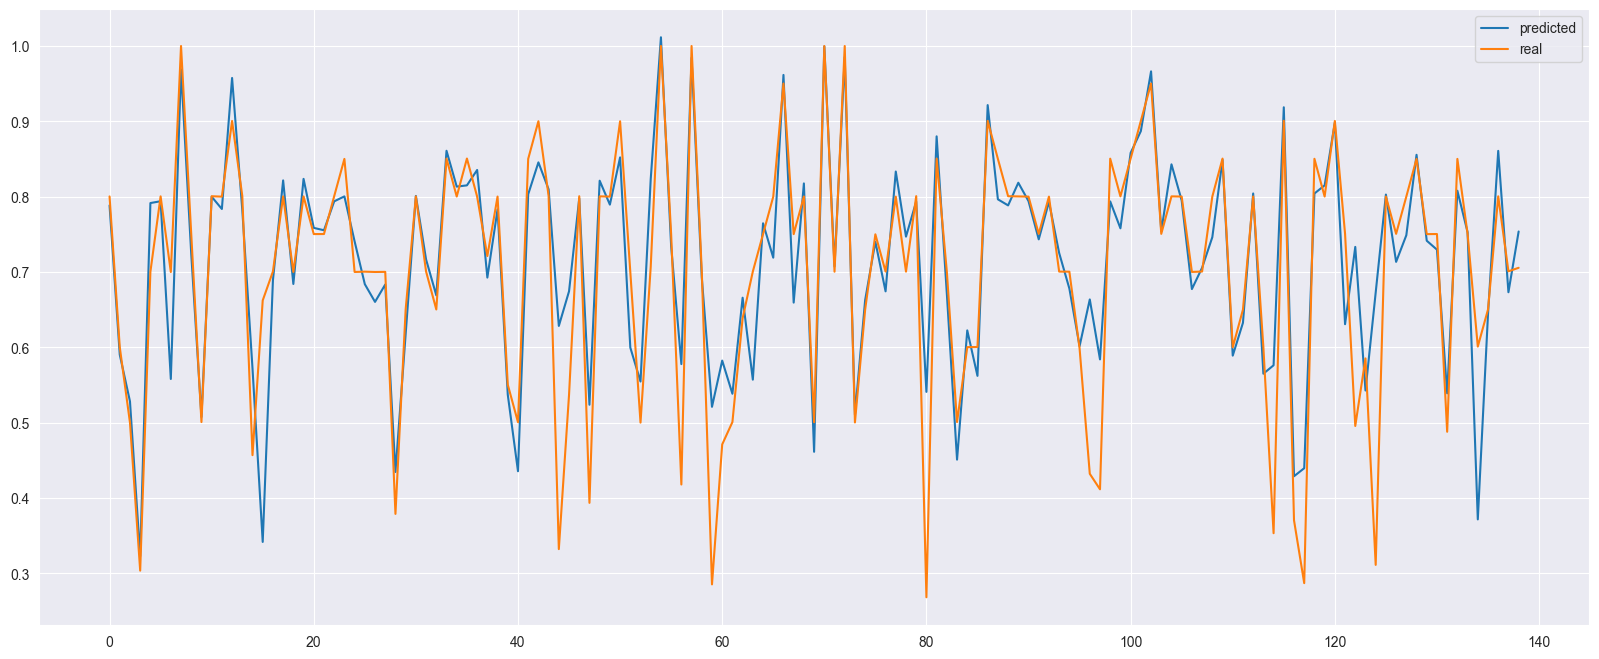

In [22]:
model_lr=LinearRegression()

model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
impresionResultados(y_test, pred_test)

graficar(pred_test, y_test)

test_MSE: 0.007145377447768957
test_MAE: 0.05005071845627374
R2_score:0.7380086627295045


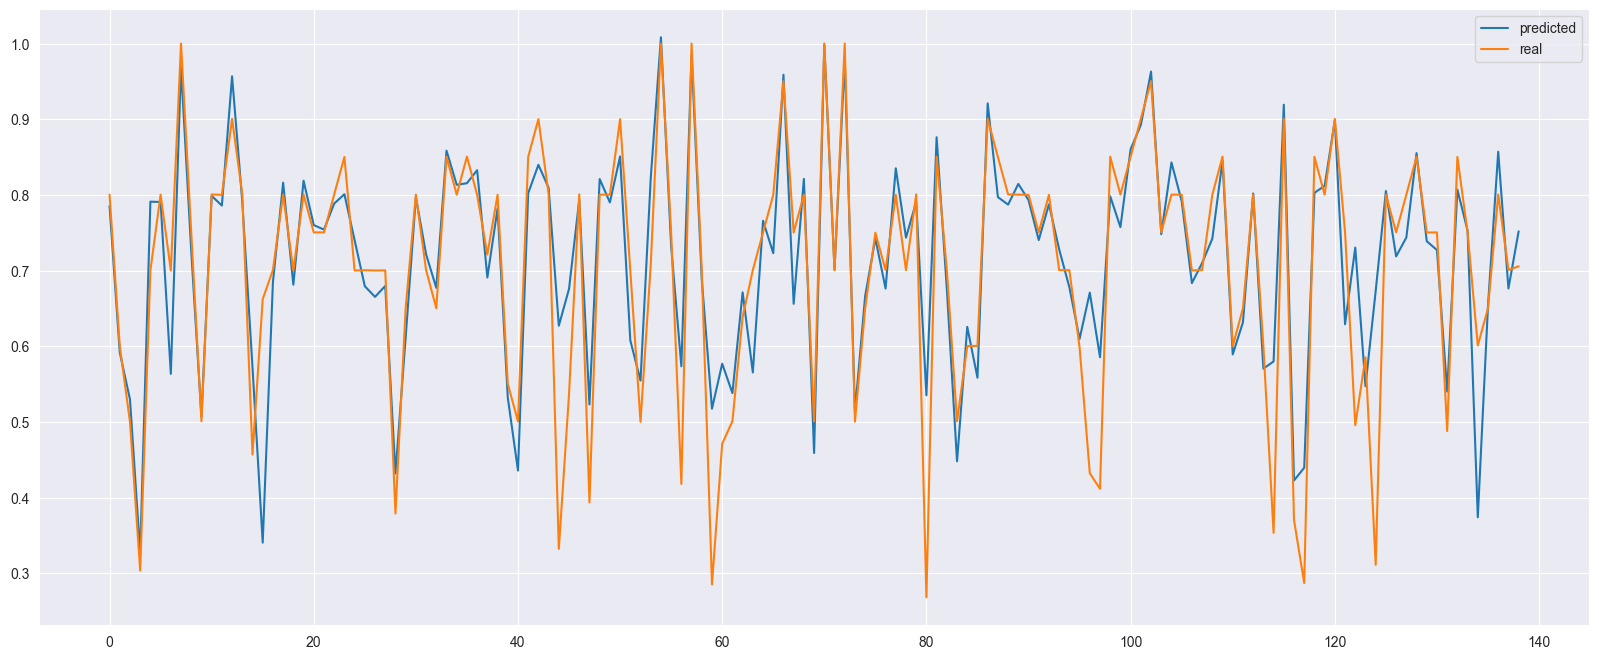

In [20]:
#label encoding
model_lr=LinearRegression()

model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
impresionResultados(y_test, pred_test)

graficar(pred_test, y_test)

- Decision Tree Regressor

test_MSE: 0.009601070779774791
test_MAE: 0.04910785153237411
R2_score:0.647968579517479


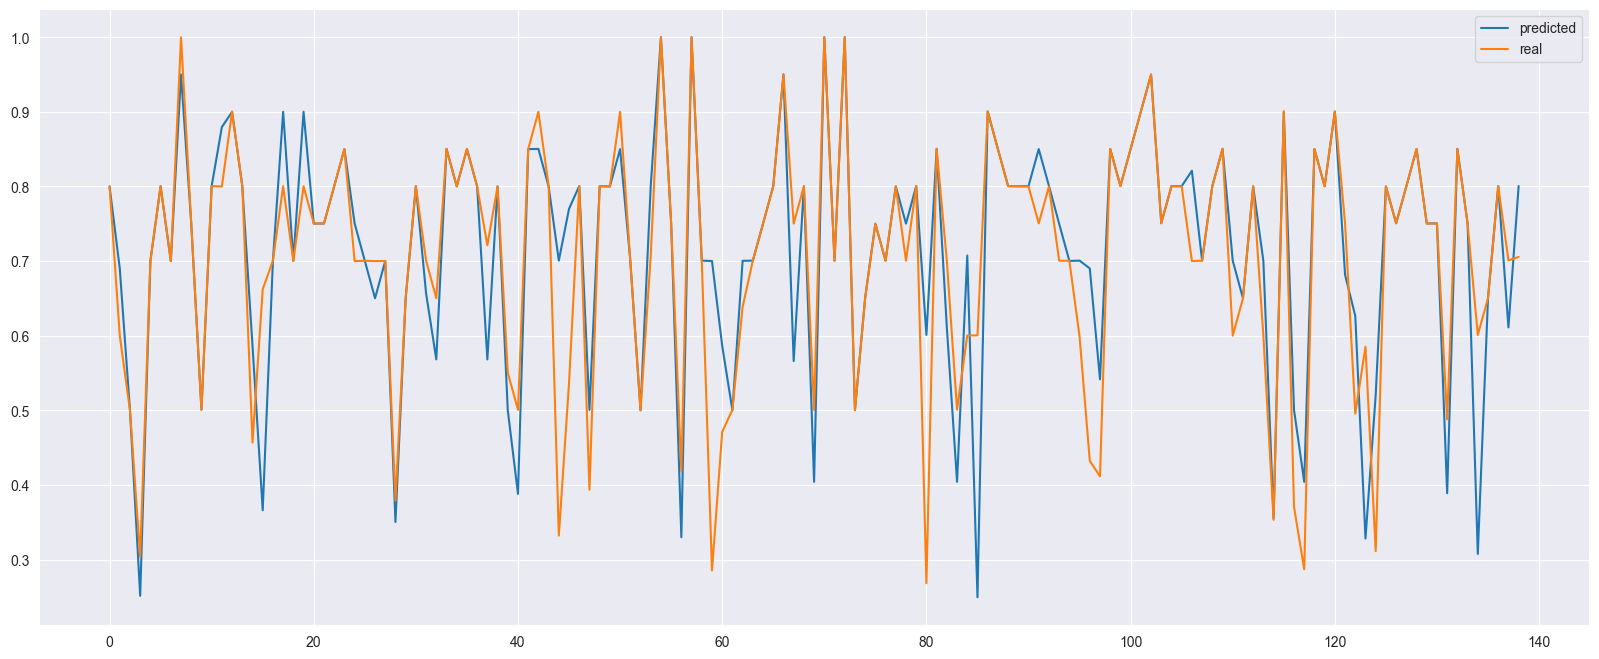

In [23]:
dt_regressor = DecisionTreeRegressor(random_state = 0)

dt_regressor.fit(x_train,y_train)
pred7 = dt_regressor.predict(x_test)
impresionResultados(y_test, pred7)

graficar(pred7, y_test)

test_MSE: 0.011317916378360982
test_MAE: 0.05597359799280577
R2_score:0.5850189764281413


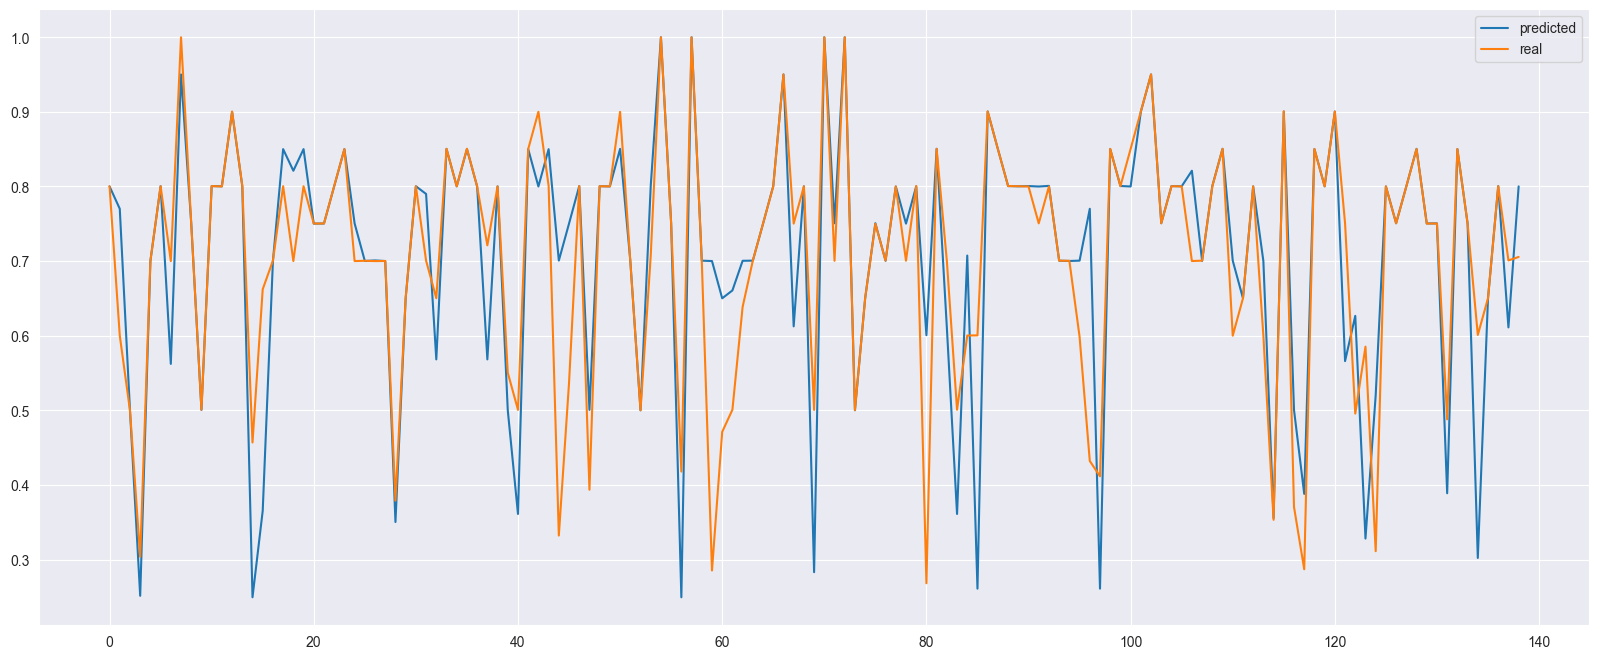

In [22]:
#label encoding
dt_regressor = DecisionTreeRegressor(random_state = 0)

dt_regressor.fit(x_train,y_train)
pred7 = dt_regressor.predict(x_test)
impresionResultados(y_test, pred7)

graficar(pred7, y_test)